In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [1, 2],
    [1, 4],
    [2, 2.5],
    [3, 5],
    [4, 2],
    [4, 10],
    [5, 10],
    [7, 4]
]).T
X
X.shape

W1 = np.array([3, 4]).reshape(-1, 1)
W1 = W1 / np.linalg.norm(W1)
W1
W1.shape

array([[ 1. ,  1. ,  2. ,  3. ,  4. ,  4. ,  5. ,  7. ],
       [ 2. ,  4. ,  2.5,  5. ,  2. , 10. , 10. ,  4. ]])

(2, 8)

array([[0.6],
       [0.8]])

(2, 1)

In [3]:
X.shape, W1.shape
coefficients = X.T @ W1
coefficients
coefficients.shape

((2, 8), (2, 1))

array([[ 2.2],
       [ 3.8],
       [ 3.2],
       [ 5.8],
       [ 4. ],
       [10.4],
       [11. ],
       [ 7.4]])

(8, 1)

((2, 1), (8, 1))

array([[ 1. ,  1. ,  2. ,  3. ,  4. ,  4. ,  5. ,  7. ],
       [ 2. ,  4. ,  2.5,  5. ,  2. , 10. , 10. ,  4. ]])

array([[1.32, 2.28, 1.92, 3.48, 2.4 , 6.24, 6.6 , 4.44],
       [1.76, 3.04, 2.56, 4.64, 3.2 , 8.32, 8.8 , 5.92]])

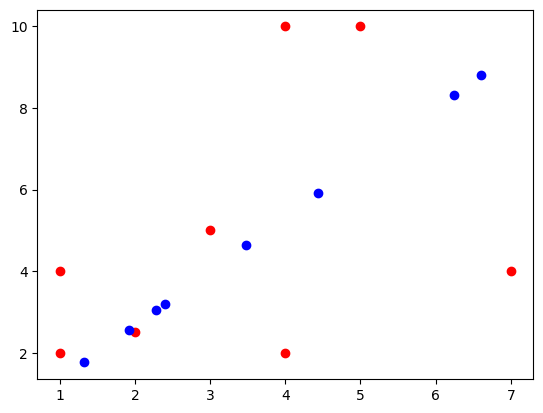

In [4]:
W1.shape, coefficients.shape
X_reconstructed = W1 @ coefficients.T

X
X_reconstructed

_ = plt.scatter(*X, color='r')
_ = plt.scatter(*X_reconstructed, color='b')

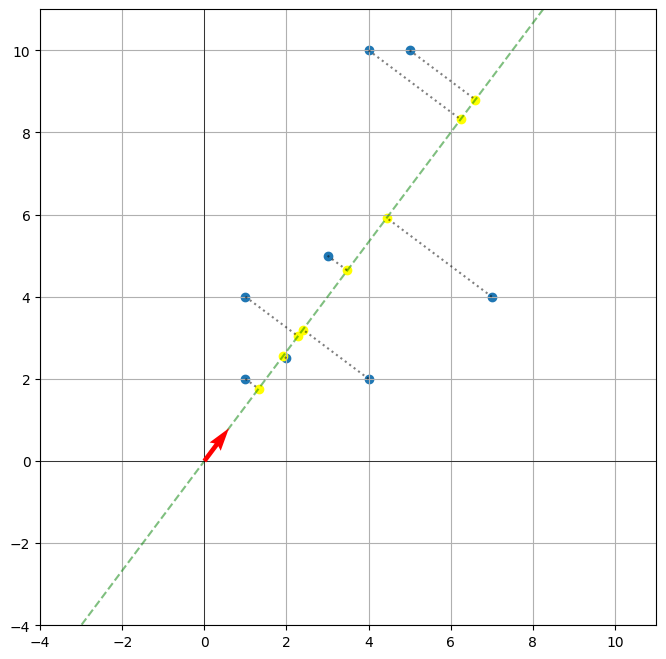

In [5]:
_ = plt.figure(figsize=(8, 8))
_ = plt.scatter(*X)
_ = plt.scatter(*X_reconstructed, color='yellow')
_ = plt.quiver(0, 0, *W1, angles='xy', scale_units='xy', scale=1,
               color='r', zorder=3)
t = np.array([-20, 20])
_ = plt.plot(t * W1[0, 0], t * W1[1, 0], 'g--', alpha=0.5)

for orig, recon in zip(X.T, X_reconstructed.T):
  _ = plt.plot([orig[0], recon[0]], [orig[1], recon[1]], 'k:', alpha=0.5)

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
_ = plt.xlim(-4, 11)
_ = plt.ylim(-4, 11)
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)

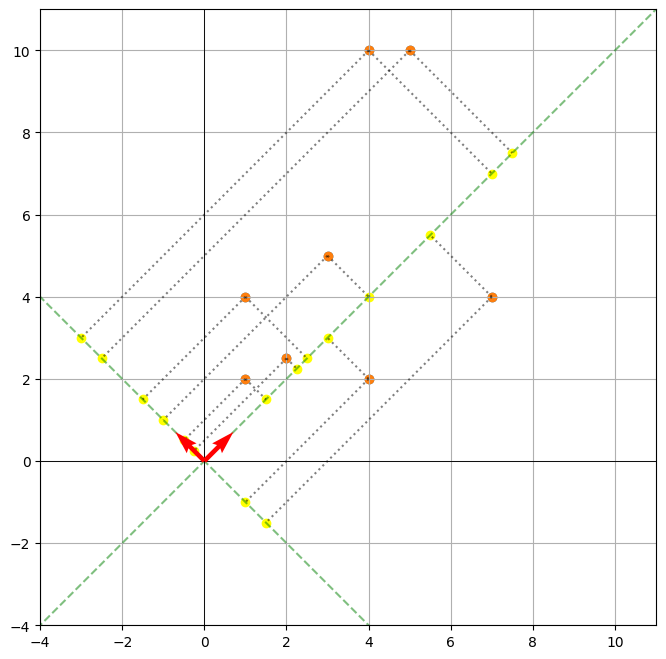

In [6]:
_ = plt.figure(figsize=(8, 8))


def plot_projection(X, W):
  # X = X.T
  W = W.reshape(-1, 1)
  W = W / np.linalg.norm(W)

  coeffs = X.T @ W
  X_recon = W @ coeffs.T

  # print("Normalized W:\n", W)
  # print("Coefficients:\n", coeffs)

  plt.scatter(*X)
  plt.scatter(*X_recon, color='yellow')
  plt.quiver(0, 0, *W, angles='xy', scale_units='xy', scale=1, color='r', zorder=3)

  t = np.array([-20, 20])
  plt.plot(t * W[0, 0], t * W[1, 0], 'g--', alpha=0.5)

  for orig, recon in zip(X.T, X_recon.T):
    plt.plot([orig[0], recon[0]], [orig[1], recon[1]], 'k:', alpha=0.5)

  plt.gca().set_aspect('equal', adjustable='box')
  plt.grid(True)
  plt.xlim(-4, 11)
  plt.ylim(-4, 11)
  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)


W1 = np.array([2, 2])
W2 = np.array([-W1[1], W1[0]])

plot_projection(X, W1)
plot_projection(X, W2)